###### Francky Ciceron
###### Week 8 Assignment
###### Pandas Retail Store Analysis

In [1]:
import pandas as pd
import glob

In [2]:
#1. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")

In [3]:
#2. Create a dictionary of DataFrames
dataframes = {file: pd.read_csv(file) for file in csv_files}


In [4]:
#3. Display the first few rows of each DataFrame
for file, df in dataframes.items():
    print(f"\n--- {file} ---")
    print(df.head())


--- wk8-customers.csv ---
   customer_id first_name last_name                  email           phone  \
0            1      James     Smith  james.smith@gmail.com    555-123-4567   
1            2       Mary   Johnson                    NaN    212.555.6789   
2            3       John  Williams    jwilliams@yahoo.com  (555) 987-6543   
3            4   Patricia     Brown     pbrown@hotmail.com      5551234567   
4            5     Robert     Jones     rjones23@gmail.com    555-987-3456   

        address         city       state    zip_code registration_date  
0   123 Main St     New York          NY       10001        2021-03-15  
1  456 Park Ave     New York          NY       10022        2020-11-02  
2  789 Broadway  Los Angeles  California  90001-1234        2021-05-20  
3    321 Elm St      Chicago          IL       60601               NaN  
4   555 Pine St      Houston          TX       77002        2020-09-12  

--- wk8-inventory.csv ---
   inventory_id  store_id  product_id  

In [5]:
# See all keys (file names)
print(dataframes.keys())

dict_keys(['wk8-customers.csv', 'wk8-inventory.csv', 'wk8-products.csv', 'wk8-sales.csv', 'wk8-stores.csv'])


In [5]:
inventory_df = dataframes["wk8-inventory.csv"]
sales_df = dataframes["wk8-sales.csv"]
stores_df = dataframes["wk8-stores.csv"]
customers_df = dataframes["wk8-customers.csv"]
products_df = dataframes["wk8-products.csv"]

In [7]:
# check first rows to make sure everything loaded correctly
print(inventory_df.head())
print(sales_df.head())
print(stores_df.head())
print(customers_df.head())
print(products_df.head())

   inventory_id  store_id  product_id  quantity_in_stock last_restock_date  \
0             1         1           1                 25        2022-10-15   
1             2         1           5                 42        2022-11-02   
2             3         1          10                 18        2022-09-30   
3             4         1          15                  5        2022-10-20   
4             5         1          20                 12               NaN   

   reorder_level  
0           10.0  
1           15.0  
2            8.0  
3           10.0  
4           15.0  
   sale_id        date  store_id  customer_id  product_id  quantity    total  \
0        1  2022-01-15       3.0           12           5         2    49.98   
1        2  2022-01-16       1.0            5          10         1    49.99   
2        3  2022-01-18       2.0            8           3         1   349.99   
3        4  2022-01-20       4.0           20           7         1   349.99   
4        5  2022-

In [8]:
#Look at the Products Data Frame
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    30 non-null     int64  
 1   product_name  30 non-null     object 
 2   category      30 non-null     object 
 3   subcategory   30 non-null     object 
 4   brand         30 non-null     object 
 5   price         30 non-null     float64
 6   cost          30 non-null     float64
 7   weight        28 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ KB


In [9]:
#Look at the sales Data Frame
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_id         40 non-null     int64  
 1   date            39 non-null     object 
 2   store_id        39 non-null     float64
 3   customer_id     40 non-null     int64  
 4   product_id      40 non-null     int64  
 5   quantity        40 non-null     int64  
 6   total           40 non-null     float64
 7   payment_method  39 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ KB


In [10]:
#Look at the inventory Data Frame
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inventory_id       75 non-null     int64  
 1   store_id           75 non-null     int64  
 2   product_id         75 non-null     int64  
 3   quantity_in_stock  75 non-null     int64  
 4   last_restock_date  66 non-null     object 
 5   reorder_level      69 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.6+ KB


In [11]:
#Look at the stores Data Frame
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      15 non-null     int64  
 1   store_name    15 non-null     object 
 2   address       15 non-null     object 
 3   city          15 non-null     object 
 4   state         15 non-null     object 
 5   zip_code      15 non-null     object 
 6   region        15 non-null     object 
 7   size_sqft     13 non-null     float64
 8   opening_date  14 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ KB


In [12]:
#Look at the customers Data Frame
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        31 non-null     int64 
 1   first_name         31 non-null     object
 2   last_name          31 non-null     object
 3   email              28 non-null     object
 4   phone              29 non-null     object
 5   address            31 non-null     object
 6   city               31 non-null     object
 7   state              31 non-null     object
 8   zip_code           30 non-null     object
 9   registration_date  28 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.6+ KB


In [13]:
# summary statistics of the products table
products_df.describe()

,product_id,price,cost,weight
count,30.000000,30.000000,30.000000,28.000000
mean,15.500000,191.724000,203.159000,3.835714
std,8.803408,452.483576,278.924138,5.693236
min,1.000000,-1599.990000,1.800000,0.200000
25%,8.250000,46.990000,28.375000,0.500000
50%,15.500000,134.990000,82.500000,1.150000
75%,22.750000,322.490000,236.250000,3.750000
max,30.000000,1299.990000,1100.000000,25.000000


In [14]:
# summary statistics of the Sales table
sales_df.describe()

,sale_id,store_id,customer_id,product_id,quantity,total
count,40.000000,39.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,6.487179,14.075000,13.500000,1.625000,352.296500
std,11.690452,4.235637,8.303189,8.857852,0.952392,377.625776
min,1.000000,1.000000,1.000000,1.000000,1.000000,19.980000
25%,10.750000,3.000000,6.750000,5.750000,1.000000,99.737500
50%,20.500000,6.000000,13.500000,11.500000,1.000000,229.985000
75%,30.250000,9.500000,20.250000,21.250000,2.000000,352.487500
max,40.000000,15.000000,29.000000,30.000000,5.000000,1599.990000


In [15]:
# summary statistics of the inventory table
inventory_df.describe()

,inventory_id,store_id,product_id,quantity_in_stock,reorder_level
count,75.000000,75.000000,75.000000,75.000000,69.000000
mean,38.000000,8.000000,12.733333,22.640000,12.681159
std,21.794495,4.349588,7.179801,13.923187,3.327659
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,19.500000,4.000000,6.500000,15.000000,10.000000
50%,38.000000,8.000000,13.000000,25.000000,10.000000
75%,56.500000,12.000000,19.000000,33.500000,15.000000
max,75.000000,15.000000,25.000000,45.000000,20.000000


In [16]:
#check for missing values in inventory data frame
inventory_df.isnull().sum()

inventory_id         0
store_id             0
product_id           0
quantity_in_stock    0
last_restock_date    9
reorder_level        6
dtype: int64

In [17]:
#check for missing values in products data frame
products_df.isnull().sum()

product_id      0
product_name    0
category        0
subcategory     0
brand           0
price           0
cost            0
weight          2
dtype: int64

In [18]:
#check for missing values in sales data frame
sales_df.isnull().sum()

sale_id           0
date              1
store_id          1
customer_id       0
product_id        0
quantity          0
total             0
payment_method    1
dtype: int64

In [19]:
#check for missing values in stores data frame
stores_df.isnull().sum()

store_id        0
store_name      0
address         0
city            0
state           0
zip_code        0
region          0
size_sqft       2
opening_date    1
dtype: int64

In [20]:
#check for missing values in customers data frame
customers_df.isnull().sum()

customer_id          0
first_name           0
last_name            0
email                3
phone                2
address              0
city                 0
state                0
zip_code             1
registration_date    3
dtype: int64

In [21]:
#Display data types for customers:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        31 non-null     int64 
 1   first_name         31 non-null     object
 2   last_name          31 non-null     object
 3   email              28 non-null     object
 4   phone              29 non-null     object
 5   address            31 non-null     object
 6   city               31 non-null     object
 7   state              31 non-null     object
 8   zip_code           30 non-null     object
 9   registration_date  28 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.6+ KB


In [22]:
#Display data types for stores:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      15 non-null     int64  
 1   store_name    15 non-null     object 
 2   address       15 non-null     object 
 3   city          15 non-null     object 
 4   state         15 non-null     object 
 5   zip_code      15 non-null     object 
 6   region        15 non-null     object 
 7   size_sqft     13 non-null     float64
 8   opening_date  14 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ KB


In [23]:
#Display data types for sales:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_id         40 non-null     int64  
 1   date            39 non-null     object 
 2   store_id        39 non-null     float64
 3   customer_id     40 non-null     int64  
 4   product_id      40 non-null     int64  
 5   quantity        40 non-null     int64  
 6   total           40 non-null     float64
 7   payment_method  39 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ KB


In [24]:
#Display data types for products:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    30 non-null     int64  
 1   product_name  30 non-null     object 
 2   category      30 non-null     object 
 3   subcategory   30 non-null     object 
 4   brand         30 non-null     object 
 5   price         30 non-null     float64
 6   cost          30 non-null     float64
 7   weight        28 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ KB


In [25]:
#Display data types for inventory:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inventory_id       75 non-null     int64  
 1   store_id           75 non-null     int64  
 2   product_id         75 non-null     int64  
 3   quantity_in_stock  75 non-null     int64  
 4   last_restock_date  66 non-null     object 
 5   reorder_level      69 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.6+ KB


In [28]:
# Retrieve the number of unique products in the product catalog
products_df.describe(include = "all")

,product_id,product_name,category,subcategory,brand,price,cost,weight
count,30.000000,30,30,30,30,30.000000,30.000000,28.000000
unique,NaN,30,19,22,27,NaN,NaN,NaN
top,NaN,Apple iPhone 13,Electronics,Smartphones,Apple,NaN,NaN,NaN
freq,NaN,1,5,2,2,NaN,NaN,NaN
mean,15.500000,NaN,NaN,NaN,NaN,191.724000,203.159000,3.835714
std,8.803408,NaN,NaN,NaN,NaN,452.483576,278.924138,5.693236
min,1.000000,NaN,NaN,NaN,NaN,-1599.990000,1.800000,0.200000
25%,8.250000,NaN,NaN,NaN,NaN,46.990000,28.375000,0.500000
50%,15.500000,NaN,NaN,NaN,NaN,134.990000,82.500000,1.150000
75%,22.750000,NaN,NaN,NaN,NaN,322.490000,236.250000,3.750000


In [27]:
# Retrieve the number of unique products in the product catalog
products_df['product_id'].nunique()

30

In [29]:
#Retrieve the 5 most expensive products:
top_5_expensive = products_df.sort_values(by='price', ascending=False).head(5)
print(top_5_expensive)


    product_id        product_name        category  subcategory    brand  \
3            4         Dell XPS 13     Electronics      Laptops     Dell   
0            1     Apple iPhone 13     Electronics  Smartphones    Apple   
1            2  Samsung Galaxy S21     electronics  Smartphones  Samsung   
19          20    Dyson V11 Vacuum  HOME & KITCHEN   Appliances    Dyson   
26          27  Sony PlayStation 5     Electronics       Gaming     Sony   

      price    cost  weight  
3   1299.99  899.99    2.80  
0    899.99  649.99    0.45  
1    799.99  539.99    0.50  
19   599.99  375.00    6.70  
26   499.99  399.00    4.50  


In [36]:
# Retreiving the store with the largest floor space:
largest_store = stores_df.sort_values(by='size_sqft', ascending=False).iloc[0]
print(f"The store with the largest floor space is '{largest_store['store_name']}' with {largest_store['size_sqft']} sqft.")

The store with the largest floor space is 'Los Angeles Plaza' with 55000.0 sqft.


In [38]:
#Number of customers by State
customers_df["state"].value_counts()

state
TX                4
CA                3
NY                2
IL                1
California        1
AZ                1
PA                1
Texas             1
FL                1
OH                1
North Carolina    1
IN                1
Washington        1
CO                1
MA                1
Oregon            1
NV                1
MI                1
TN                1
Maryland          1
MD                1
KY                1
WI                1
NM                1
MO                1
Name: count, dtype: int64

<Axes: title={'center': 'Number of Customers by State'}, xlabel='state'>

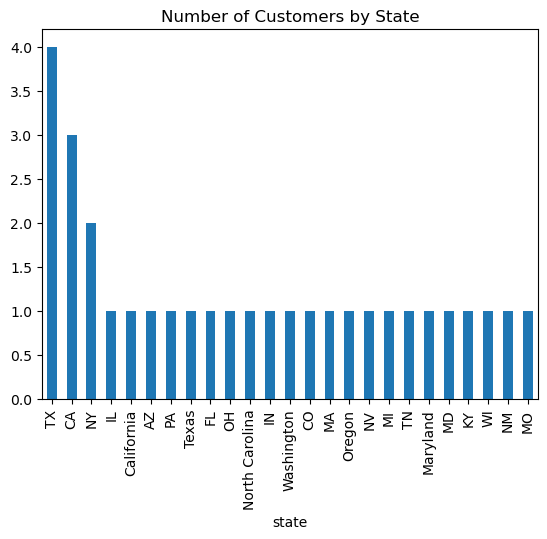

In [37]:
customers_df["state"].value_counts().plot(kind="bar", title="Number of Customers by State")

In [ ]:
#Part 2
#Identify all missing values in each dataset
#"Missing values are displayed from 16 to 20 above"

In [48]:
# summary statistics of the customer table
customers_df.describe()

,customer_id
count,31.000000
mean,15.838710
std,8.858505
min,1.000000
25%,8.500000
50%,16.000000
75%,23.500000
max,30.000000


In [40]:
# summary statistics of the stores table
stores_df.describe()

,store_id,size_sqft
count,15.000000,13.000000
mean,8.000000,30653.846154
std,4.472136,11342.002717
min,1.000000,16500.000000
25%,4.500000,22000.000000
50%,8.000000,29000.000000
75%,11.500000,35000.000000
max,15.000000,55000.000000


In [42]:
#For numerical columns with missing values, replace them with the column mean
#Filling numeric missing values at stores_df
stores_df['size_sqft'] = stores_df['size_sqft'].fillna(stores_df['size_sqft'].mean())

In [43]:
stores_df['size_sqft'].isnull().sum()

np.int64(0)

In [45]:
#Filling numeric missing values at products_df
products_df['weight'] = products_df['weight'].fillna(products_df['weight'].mean())

In [46]:
products_df['weight'].isnull().sum()

np.int64(0)

In [49]:
#Filling numeric missing values at inventory_df
inventory_df['reorder_level'] = inventory_df['reorder_level'].fillna(inventory_df['reorder_level'].mean())

In [50]:
inventory_df['reorder_level'].isnull().sum()

np.int64(0)

In [51]:
sales_df['store_id'] = sales_df['store_id'].fillna(sales_df['store_id'].mean())

In [52]:
sales_df['store_id'].isnull().sum()

np.int64(0)

In [65]:
#For categorical columns with missing values, replace them with the most frequent value
# Define columns to skip
date_columns = ['registration_date', 'date', 'last_restock_date', 'opening_date']

# Fill missing values in object columns, excluding known date columns for customers_df
for col in customers_df.select_dtypes(include='object').columns:
    if col not in date_columns:
        missing_count = customers_df[col].isnull().sum()
        if missing_count > 0:
            mode_value = customers_df[col].mode()[0]
            customers_df[col] = customers_df[col].fillna(mode_value)
            print(f"Filled {missing_count} missing values in '{col}' with mode '{mode_value}'")


In [67]:
print(customers_df.select_dtypes(include='object').isnull().sum())


first_name    0
last_name     0
email         0
phone         0
address       0
city          0
state         0
zip_code      0
dtype: int64


In [68]:
# Fill missing values in object columns, excluding known date columns for inventory_df
for col in inventory_df.select_dtypes(include='object').columns:
    if col not in date_columns:
        missing_count = inventory_df[col].isnull().sum()
        if missing_count > 0:
            mode_value = inventory_df[col].mode()[0]
            inventory_df[col] = inventory_df[col].fillna(mode_value)
            print(f"inventory_df: Filled {missing_count} missing values in '{col}' with mode '{mode_value}'")


In [69]:
print(inventory_df.select_dtypes(include='object').isnull().sum())


last_restock_date    9
dtype: int64


In [70]:
# Fill missing values in object columns, excluding known date columns for sales_df
for col in sales_df.select_dtypes(include='object').columns:
    if col not in date_columns:
        missing_count = sales_df[col].isnull().sum()
        if missing_count > 0:
            mode_value = sales_df[col].mode()[0]
            sales_df[col] = sales_df[col].fillna(mode_value)
            print(f"sales_df: Filled {missing_count} missing values in '{col}' with mode '{mode_value}'")


sales_df: Filled 1 missing values in 'payment_method' with mode 'Credit Card'


In [71]:
print(sales_df.select_dtypes(include='object').isnull().sum())

date              1
payment_method    0
dtype: int64


In [72]:
# Fill missing values in object columns, excluding known date columns for stores_df
for col in stores_df.select_dtypes(include='object').columns:
    if col not in date_columns:
        missing_count = stores_df[col].isnull().sum()
        if missing_count > 0:
            mode_value = stores_df[col].mode()[0]
            stores_df[col] = stores_df[col].fillna(mode_value)
            print(f"stores_df: Filled {missing_count} missing values in '{col}' with mode '{mode_value}'")


In [73]:
print(stores_df.select_dtypes(include='object').isnull().sum())

store_name    0
address       0
city          0
state         0
zip_code      0
region        0
dtype: int64


In [74]:
#For date columns with missing values, use forward fill or backward fill as appropriate
inventory_df['last_restock_date'] = pd.to_datetime(inventory_df['last_restock_date'], errors='coerce')

In [77]:
#For last_restock_date in inventory_df:
inventory_df['last_restock_date'] = inventory_df['last_restock_date'].ffill()

In [78]:
#For date in sales_df:
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')


In [79]:
sales_df['date'] = sales_df['date'].ffill()

In [80]:
print(inventory_df['last_restock_date'].isnull().sum())


0


In [82]:
# Define known date columns
date_columns = ['registration_date', 'last_restock_date', 'transaction_date', 'opening_date', 'date']

# Apply safe categorical fill
for df, name in [(customers_df, "customers_df"), (inventory_df, "inventory_df"),
                 (sales_df, "sales_df"), (stores_df, "stores_df")]:
    for col in df.select_dtypes(include='object').columns:
        if col not in date_columns:
            missing_count = df[col].isnull().sum()
            if missing_count > 0:
                mode_value = df[col].mode()[0]
                df[col] = df[col].fillna(mode_value)
                print(f"{name}: Filled {missing_count} missing values in '{col}' with mode '{mode_value}'")


In [83]:
# last_restoct_date for inventory_df
inventory_df['last_restock_date'] = pd.to_datetime(inventory_df['last_restock_date'], errors='coerce')
inventory_df['last_restock_date'] = inventory_df['last_restock_date'].ffill()

In [84]:
# date for sales_df
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')
sales_df['date'] = sales_df['date'].ffill()

In [85]:
print("customers_df:", customers_df['registration_date'].isnull().sum())


customers_df: 0


In [86]:
print("inventory_df:", inventory_df['last_restock_date'].isnull().sum())


inventory_df: 0


In [87]:
print("sales_df:", sales_df['date'].isnull().sum())

sales_df: 0


In [88]:
print("stores_df:", stores_df['opening_date'].isnull().sum())


stores_df: 0


In [6]:
#Removing Duplicates
# Check for duplicates in customers_df
duplicate_customers = customers_df[customers_df.duplicated()]
print(f"Duplicate rows in customers_df:\n{duplicate_customers}")

Duplicate rows in customers_df:
Empty DataFrame
Columns: [customer_id, first_name, last_name, email, phone, address, city, state, zip_code, registration_date]
Index: []


In [7]:
# Check for duplicates in products_df
duplicate_products = products_df[products_df.duplicated()]
print(f"Duplicate rows in products_df:\n{duplicate_products}")

Duplicate rows in products_df:
Empty DataFrame
Columns: [product_id, product_name, category, subcategory, brand, price, cost, weight]
Index: []


In [8]:
print("Number of duplicate rows in customers_df:", customers_df.duplicated().sum())

Number of duplicate rows in customers_df: 0


In [9]:
print("Number of duplicate rows in products_df:", products_df.duplicated().sum())

Number of duplicate rows in products_df: 0


In [10]:
# Check for duplicate customer IDs
print("Duplicate customer_id count:", customers_df.duplicated(subset=["customer_id"]).sum())


Duplicate customer_id count: 1


In [11]:
# Check for duplicate product IDs
print("Duplicate product_id count:", products_df.duplicated(subset=["product_id"]).sum())

Duplicate product_id count: 0


In [12]:
# Show all rows with the duplicated customer_id
duplicate_id_rows = customers_df[customers_df.duplicated(subset=["customer_id"], keep=False)]
print(duplicate_id_rows)

    customer_id first_name last_name                  email         phone  \
25           26      Betty     Lewis  betty.lewis@gmail.com    5551597532   
26           26      Betty     Lewis     blewis23@gmail.com  555 159 7532   

                    address       city     state zip_code registration_date  
25       753 MacArthur Blvd  Baltimore  Maryland    21202        2020-07-01  
26  753 MacArthur Boulevard  Baltimore        MD    21202        2020-07-01  


In [13]:
# Drop row 25 (index of the less complete duplicate)
customers_df = customers_df.drop(index=25)

In [14]:
# Check new shape for customers_df
print(customers_df.shape)

(30, 10)


In [15]:
# Check if customer_id 26 still has duplicates
print(customers_df[customers_df.duplicated(subset=["customer_id"])])


Empty DataFrame
Columns: [customer_id, first_name, last_name, email, phone, address, city, state, zip_code, registration_date]
Index: []
